In [ ]:
!pip install tensorflow

In [ ]:
!pip install librosa

In [18]:
import tensorflow as tf
import numpy as np
import os
import librosa
import matplotlib.pyplot as plt
from collections import Counter

SKEWNESS AND KURTOSIS

For Time Domain Data

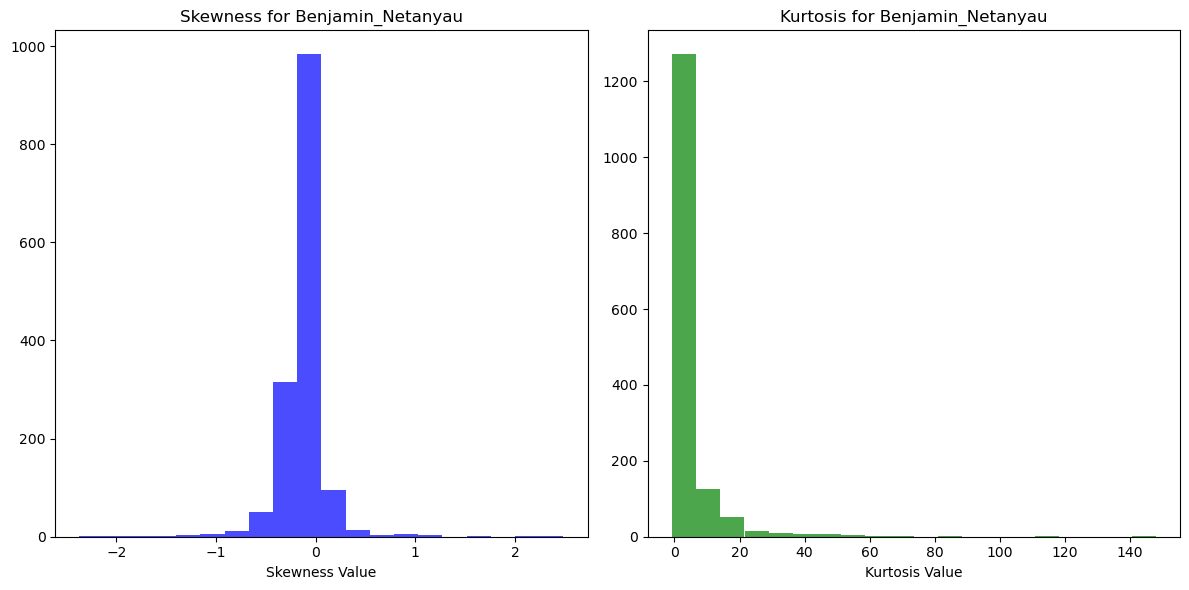

Class: Benjamin_Netanyau
Mean Skewness: -0.10, SD Skewness: 0.25
Mean Kurtosis: 3.78, SD Kurtosis: 9.24



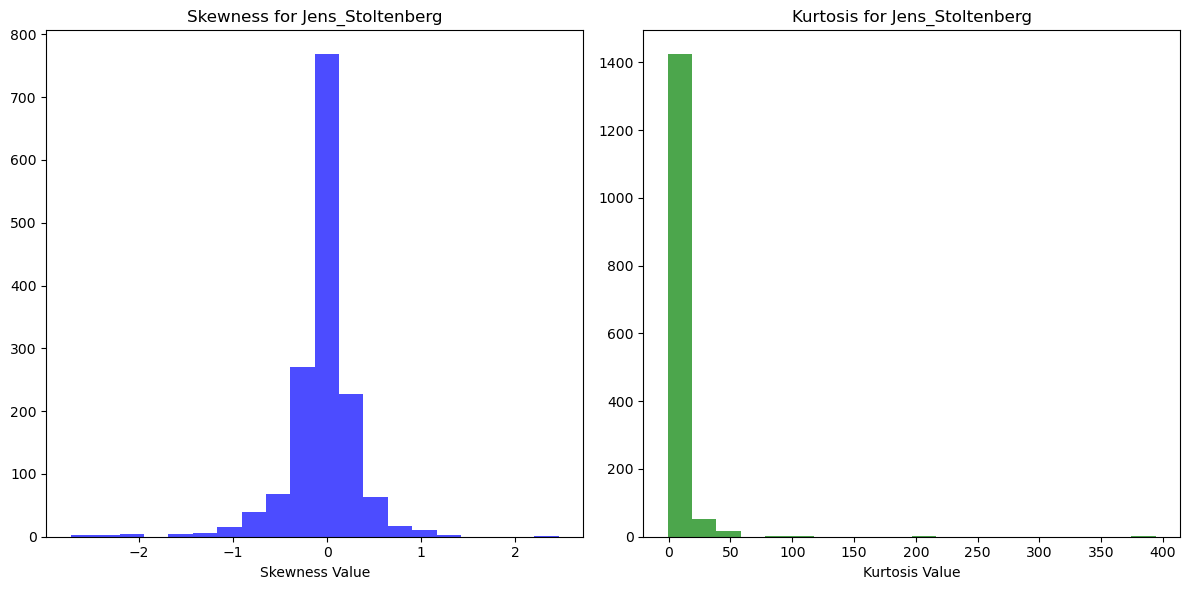

Class: Jens_Stoltenberg
Mean Skewness: -0.05, SD Skewness: 0.36
Mean Kurtosis: 5.50, SD Kurtosis: 15.17



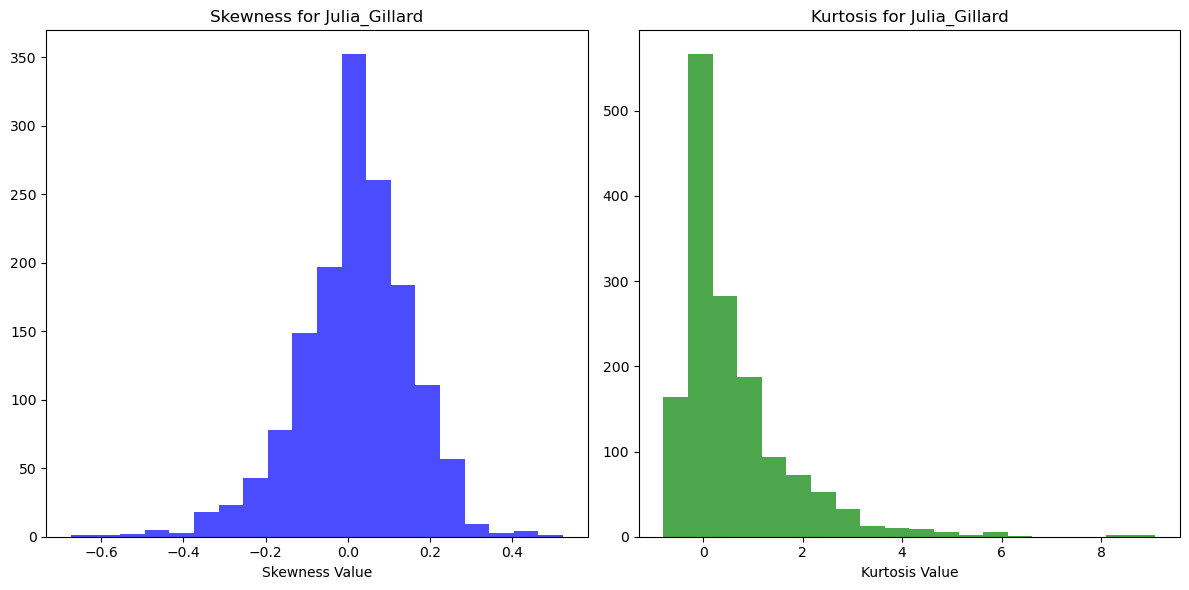

Class: Julia_Gillard
Mean Skewness: 0.02, SD Skewness: 0.14
Mean Kurtosis: 0.59, SD Kurtosis: 1.13



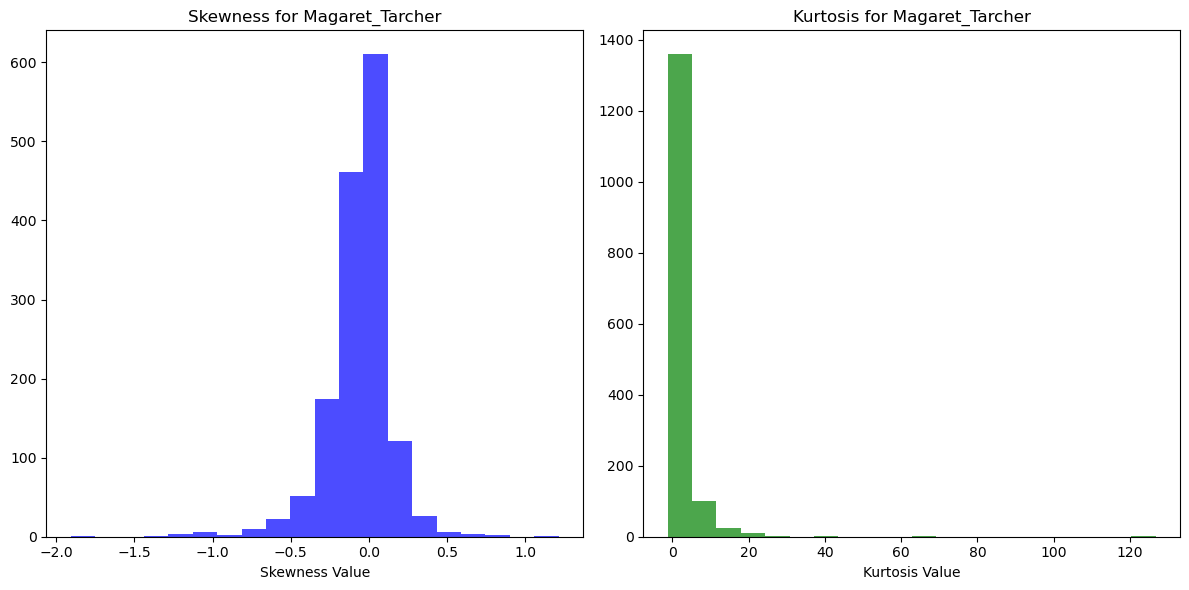

Class: Magaret_Tarcher
Mean Skewness: -0.07, SD Skewness: 0.21
Mean Kurtosis: 1.39, SD Kurtosis: 5.16



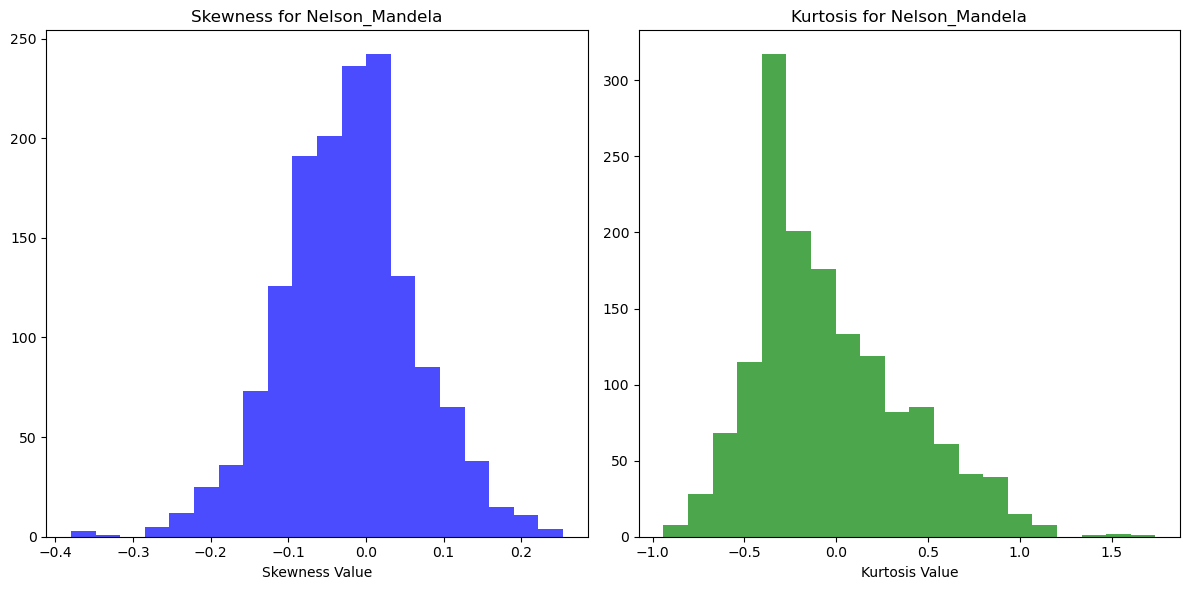

Class: Nelson_Mandela
Mean Skewness: -0.02, SD Skewness: 0.09
Mean Kurtosis: -0.04, SD Kurtosis: 0.41



In [69]:
import os
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Directory containing the audio files
audio_files_dir = r'..\archive\16000_pcm_speeches'

# Function to calculate skewness and kurtosis for a single audio file
def calculate_skewness_kurtosis(audio_file):
    sample_rate, audio_data = wavfile.read(audio_file)
    audio_data = audio_data.astype(np.float64)

    skewness = scipy.stats.skew(audio_data)
    kurtosis = scipy.stats.kurtosis(audio_data)
    
    return skewness, kurtosis

# Create a dictionary to store skewness and kurtosis values for each class
class_data = {} 

# Iterate through audio files in the directory
for class_name in os.listdir(audio_files_dir):
    if(class_name =="other"):
        break
        
    class_dir = os.path.join(audio_files_dir, class_name)
    
    if os.path.isdir(class_dir):
        class_data[class_name] = []
        
        for audio_file in os.listdir(class_dir):
            if audio_file.endswith('.wav'):
                audio_file_path = os.path.join(class_dir, audio_file)
                skewness, kurtosis = calculate_skewness_kurtosis(audio_file_path)
                class_data[class_name].append((skewness, kurtosis))

# Plot skewness and kurtosis for each class
for class_name, data in class_data.items():
    skewness_values, kurtosis_values = zip(*data)
    mean_skewness = np.mean(skewness_values)
    sd_skewness = np.std(skewness_values)
    mean_kurtosis = np.mean(kurtosis_values)
    sd_kurtosis = np.std(kurtosis_values)
    class_statistics[class_name] = (mean_skewness, sd_skewness, mean_kurtosis, sd_kurtosis)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(skewness_values, bins=20, color='blue', alpha=0.7)
    plt.title(f'Skewness for {class_name}')
    plt.xlabel('Skewness Value')

    plt.subplot(1, 2, 2)
    plt.hist(kurtosis_values, bins=20, color='green', alpha=0.7)
    plt.title(f'Kurtosis for {class_name}')
    plt.xlabel('Kurtosis Value')

    plt.tight_layout()
    plt.show()
    mean_skewness, sd_skewness, mean_kurtosis, sd_kurtosis = class_statistics[class_name]
    print(f'Class: {class_name}')
    print(f'Mean Skewness: {mean_skewness:.2f}, SD Skewness: {sd_skewness:.2f}')
    print(f'Mean Kurtosis: {mean_kurtosis:.2f}, SD Kurtosis: {sd_kurtosis:.2f}')
    print()

For Frequency Domain Data

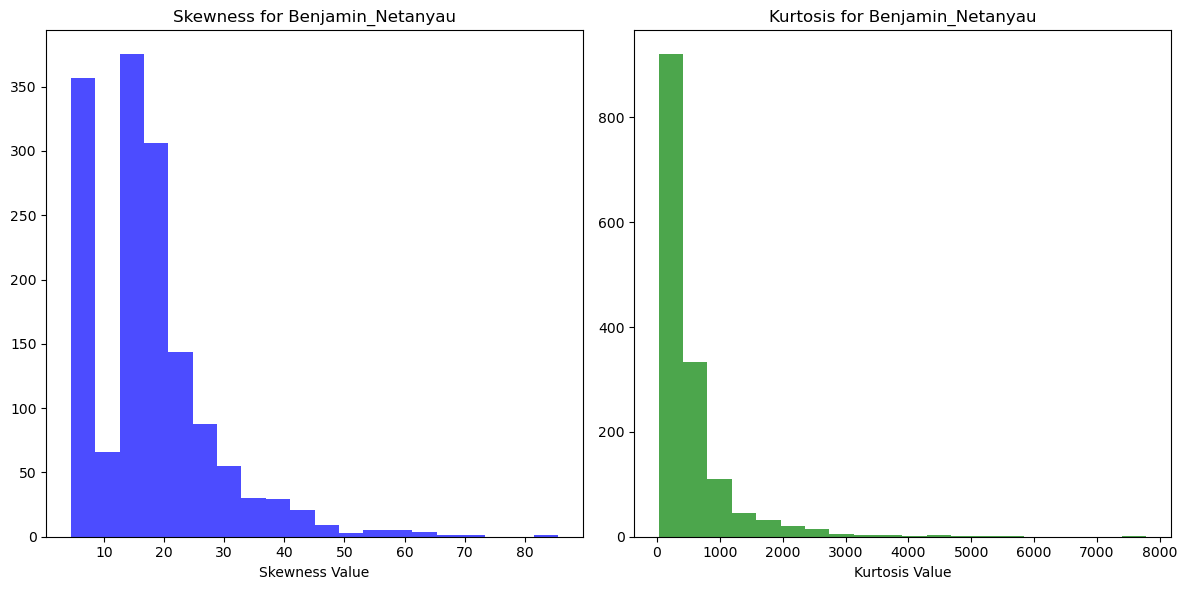

Class: Benjamin_Netanyau
Mean Skewness: 17.33, SD Skewness: 10.32
Mean Kurtosis: 511.17, SD Kurtosis: 656.23



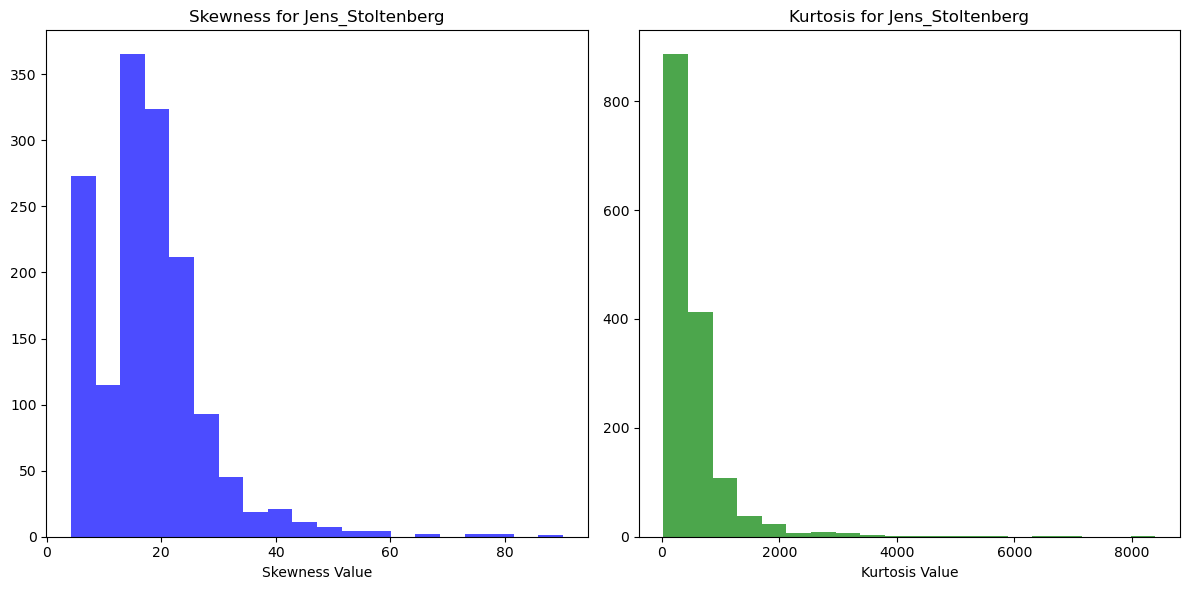

Class: Jens_Stoltenberg
Mean Skewness: 17.89, SD Skewness: 9.76
Mean Kurtosis: 517.56, SD Kurtosis: 648.41



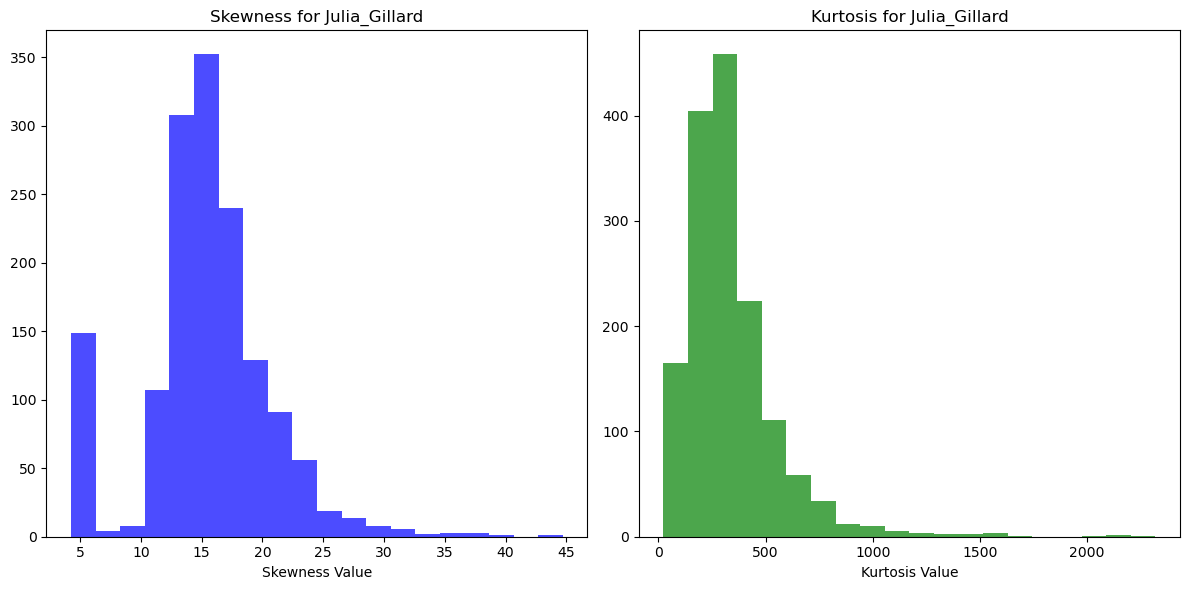

Class: Julia_Gillard
Mean Skewness: 15.46, SD Skewness: 5.27
Mean Kurtosis: 335.18, SD Kurtosis: 234.44



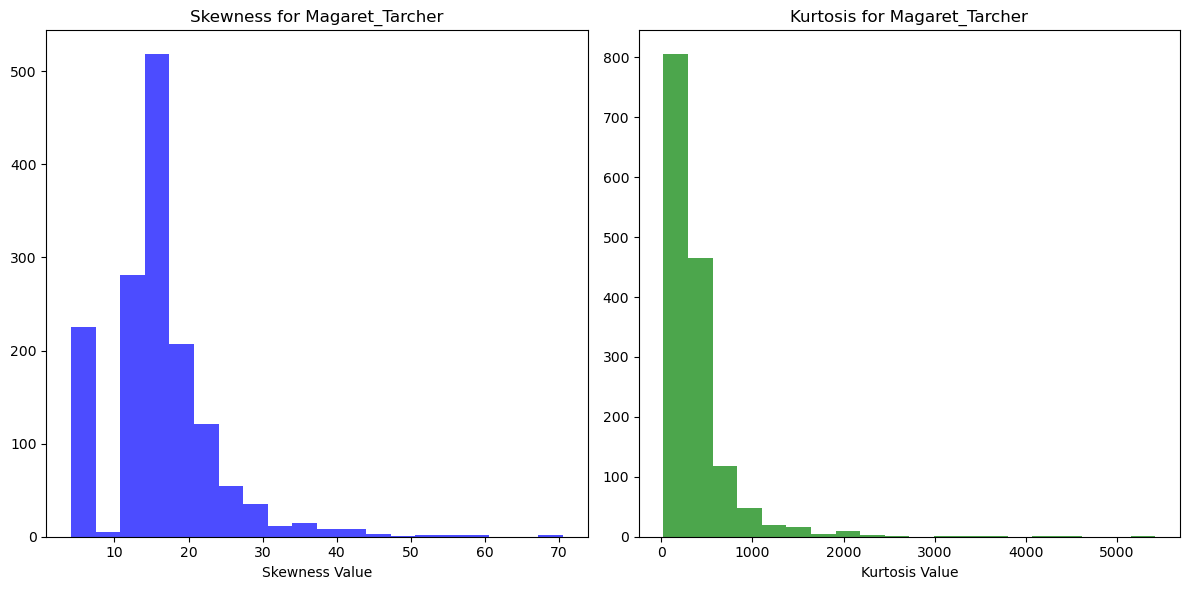

Class: Magaret_Tarcher
Mean Skewness: 15.99, SD Skewness: 7.65
Mean Kurtosis: 379.79, SD Kurtosis: 433.59



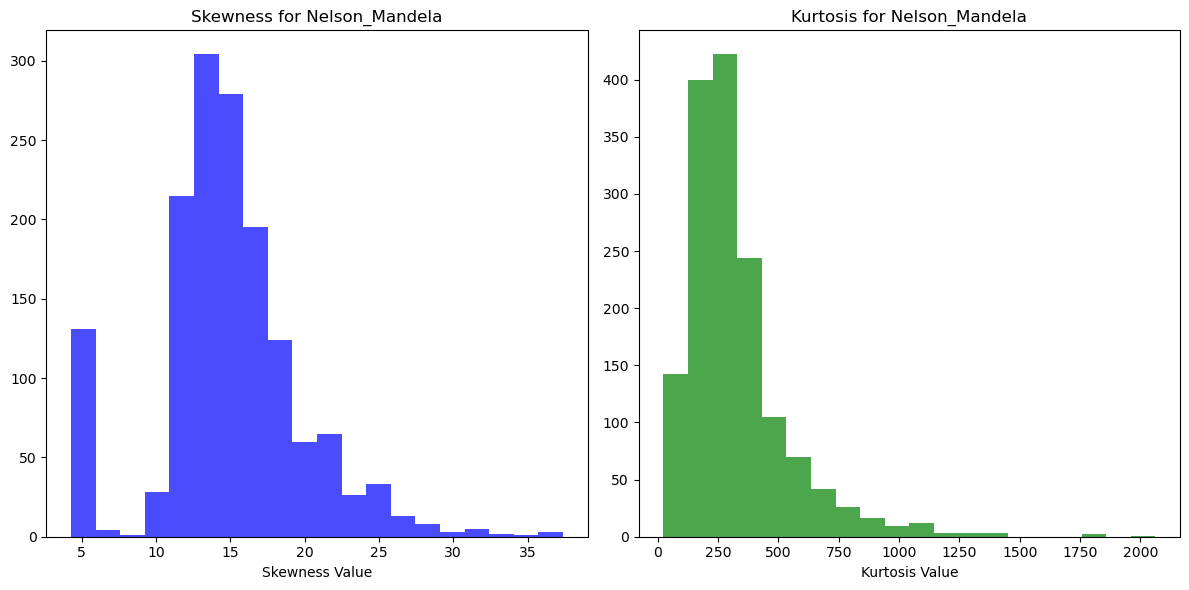

Class: Nelson_Mandela
Mean Skewness: 14.88, SD Skewness: 4.91
Mean Kurtosis: 321.39, SD Kurtosis: 218.40



In [68]:
import os
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram

# Directory containing the audio files
audio_files_dir = r'..\archive\16000_pcm_speeches'

# Function to calculate skewness and kurtosis for a single audio file
def calculate_skewness_kurtosis(audio_file):
    sample_rate, audio_data = wavfile.read(audio_file)

    # Calculate the spectrogram
    f, t, Sxx = spectrogram(audio_data, fs=sample_rate)

    # Convert the spectrogram to a 1D array for analysis
    spectrogram_data = Sxx.flatten()

    # Calculate skewness and kurtosis
    skewness = scipy.stats.skew(spectrogram_data)
    kurtosis = scipy.stats.kurtosis(spectrogram_data)
    
    return skewness, kurtosis

# Create a dictionary to store skewness and kurtosis values for each class
class_data = {}  # {class_name: [(skewness1, kurtosis1), (skewness2, kurtosis2), ...]}

# Iterate through audio files in the directory
for class_name in os.listdir(audio_files_dir):
    if(class_name =="other"):
        break
        
    class_dir = os.path.join(audio_files_dir, class_name)
    
    if os.path.isdir(class_dir):
        class_data[class_name] = []
        
        for audio_file in os.listdir(class_dir):
            if audio_file.endswith('.wav'):
                audio_file_path = os.path.join(class_dir, audio_file)
                skewness, kurtosis = calculate_skewness_kurtosis(audio_file_path)
                class_data[class_name].append((skewness, kurtosis))

class_statistics = {}
# Plot skewness and kurtosis for each class
for class_name, data in class_data.items():
    skewness_values, kurtosis_values = zip(*data)
    mean_skewness = np.mean(skewness_values)
    sd_skewness = np.std(skewness_values)
    mean_kurtosis = np.mean(kurtosis_values)
    sd_kurtosis = np.std(kurtosis_values)
    class_statistics[class_name] = (mean_skewness, sd_skewness, mean_kurtosis, sd_kurtosis)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(skewness_values, bins=20, color='blue', alpha=0.7)
    plt.title(f'Skewness for {class_name}')
    plt.xlabel('Skewness Value')

    plt.subplot(1, 2, 2)
    plt.hist(kurtosis_values, bins=20, color='green', alpha=0.7)
    plt.title(f'Kurtosis for {class_name}')
    plt.xlabel('Kurtosis Value')

    plt.tight_layout()
    plt.show()
    mean_skewness, sd_skewness, mean_kurtosis, sd_kurtosis = class_statistics[class_name]
    print(f'Class: {class_name}')
    print(f'Mean Skewness: {mean_skewness:.2f}, SD Skewness: {sd_skewness:.2f}')
    print(f'Mean Kurtosis: {mean_kurtosis:.2f}, SD Kurtosis: {sd_kurtosis:.2f}')
    print()

Statistical Analysis - MEAN & SD - TIME SERIES DATA

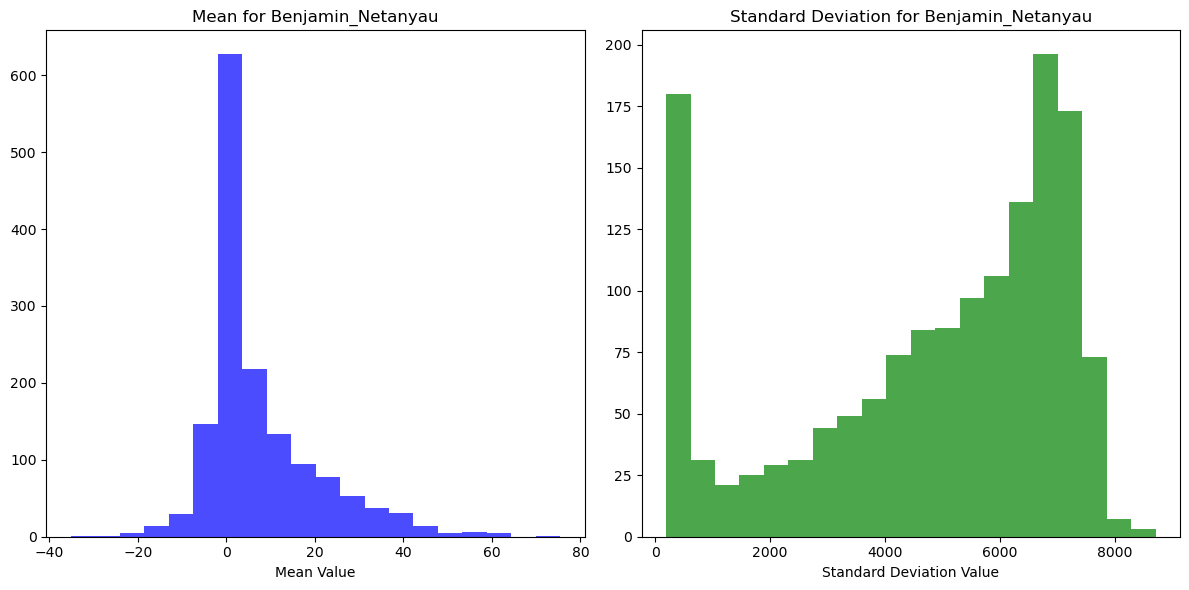

Class: Benjamin_Netanyau
Mean : 7.16
Average SD : 4791.46



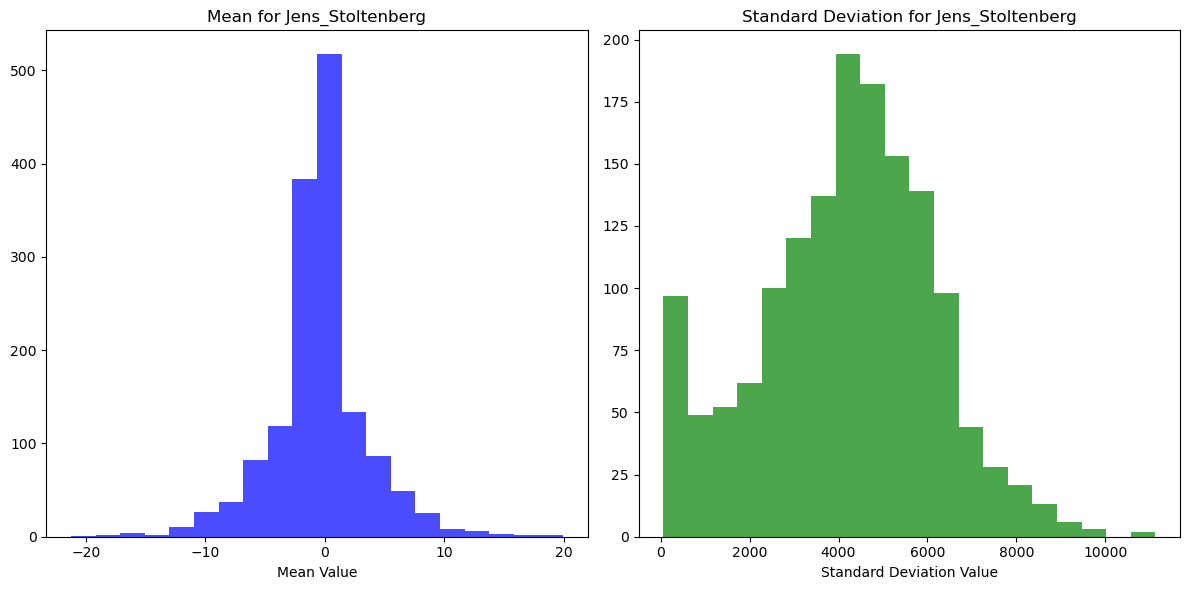

Class: Jens_Stoltenberg
Mean : -0.47
Average SD : 4152.42



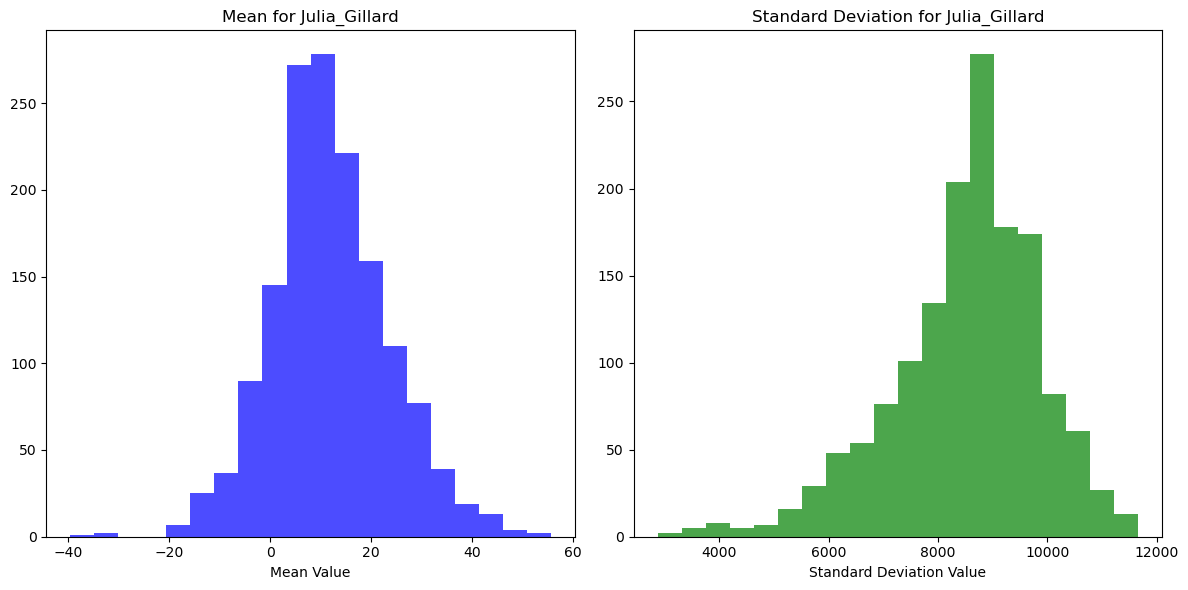

Class: Julia_Gillard
Mean : 11.80
Average SD : 8499.36



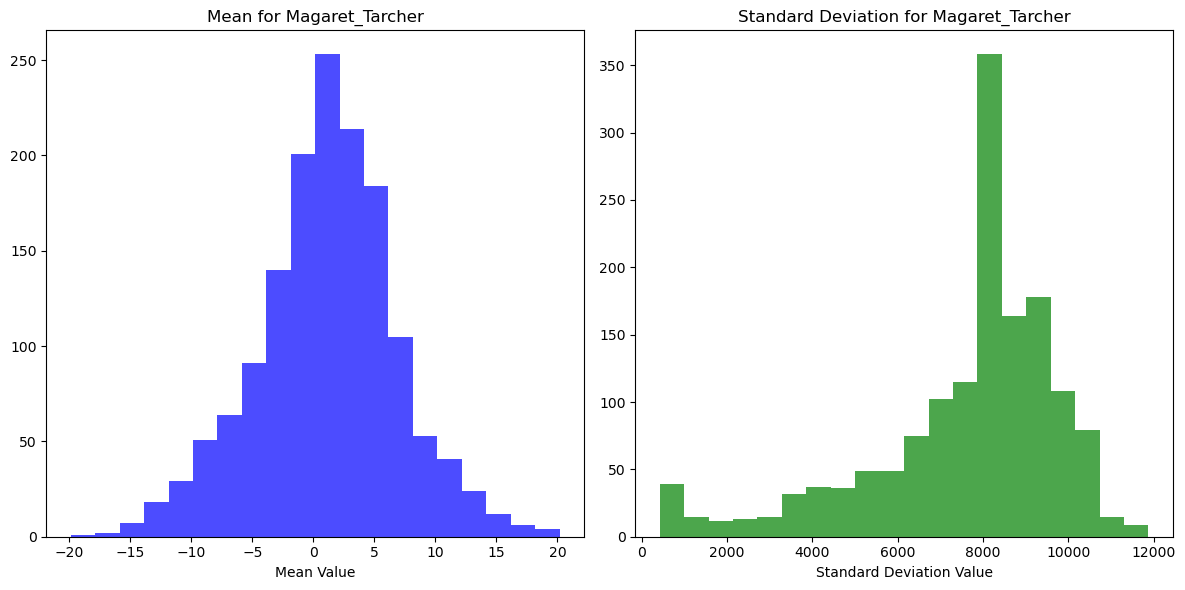

Class: Magaret_Tarcher
Mean : 1.12
Average SD : 7560.32



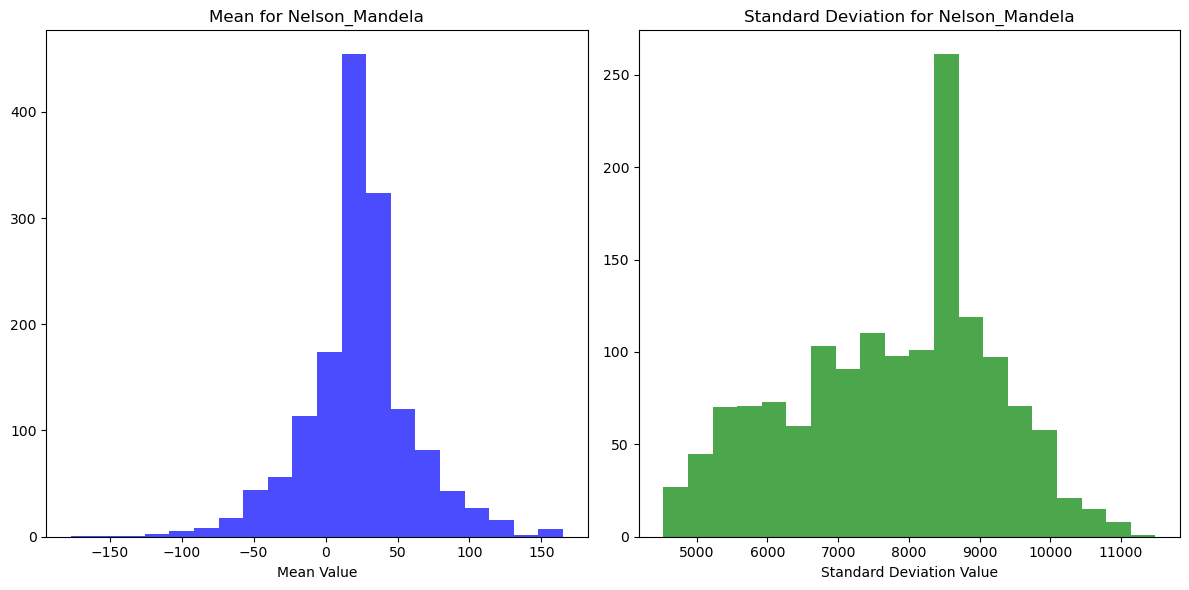

Class: Nelson_Mandela
Mean : 23.32
Average SD : 7765.39



In [83]:
audio_files_dir = r'..\archive\16000_pcm_speeches'

# Function to calculate mean and standard deviation for a single audio file
def calculate_mean_sd(audio_file):
    sample_rate, audio_data = wavfile.read(audio_file)
    
    # Calculate mean and standard deviation
    mean = np.mean(audio_data)
    sd = np.std(audio_data)
    
    return mean, sd

# Create dictionaries to store mean and standard deviation values for each class
class_means = {}  # {class_name: [mean1, mean2, ...]}
class_sds = {}    # {class_name: [sd1, sd2, ...]}

# Iterate through audio files in the directory
for class_name in os.listdir(audio_files_dir):
    if(class_name =="other"):
        break
    class_dir = os.path.join(audio_files_dir, class_name)
    
    if os.path.isdir(class_dir):
        class_means[class_name] = []
        class_sds[class_name] = []
        
        for audio_file in os.listdir(class_dir):
            if audio_file.endswith('.wav'):
                audio_file_path = os.path.join(class_dir, audio_file)
                mean, sd = calculate_mean_sd(audio_file_path)
                class_means[class_name].append(mean)
                class_sds[class_name].append(sd)

# Plot the means and standard deviations for each class
for class_name in class_means.keys():
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(class_means[class_name], bins=20, color='blue', alpha=0.7)
    plt.title(f'Mean for {class_name}')
    plt.xlabel('Mean Value')

    plt.subplot(1, 2, 2)
    plt.hist(class_sds[class_name], bins=20, color='green', alpha=0.7)
    plt.title(f'Standard Deviation for {class_name}')
    plt.xlabel('Standard Deviation Value')

    plt.tight_layout()
    plt.show()
    mean = np.mean(class_means[class_name])
    sd = np.mean(class_sds[class_name])
    print(f'Class: {class_name}')
    print(f'Mean : {mean:.2f}')
    print(f'Average SD : {sd:.2f}')
    print()

CHECK FOR CLASS IMBALANCED

['Benjamin_Netanyau', 'Jens_Stoltenberg', 'Julia_Gillard', 'Magaret_Tarcher', 'Nelson_Mandela']
[1500, 1500, 1501, 1500, 1500]


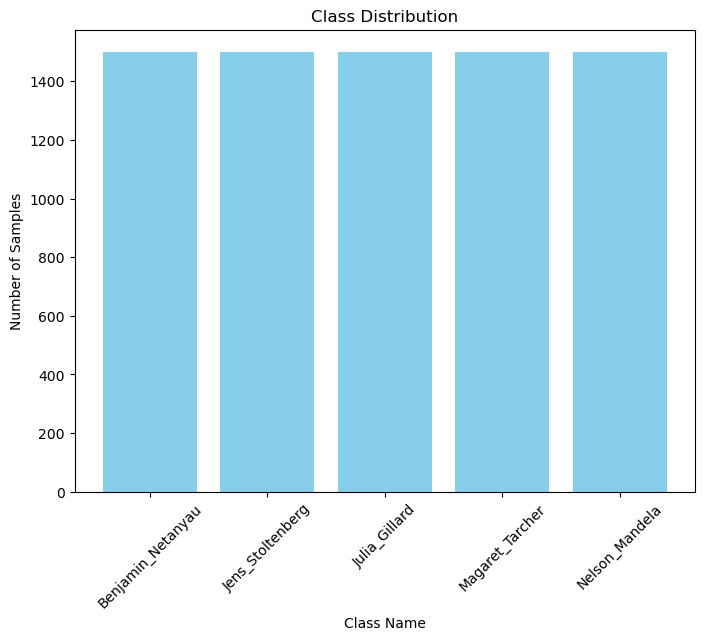

In [87]:
audio_files_dir = r'..\archive\16000_pcm_speeches'

# Create a dictionary to store the count of samples in each class
class_counts = {}

# Iterate through audio files in the directory
for class_name in os.listdir(audio_files_dir):
    if(class_name =="other"):
        break
        
    class_dir = os.path.join(audio_files_dir, class_name)
    if os.path.isdir(class_dir):
        class_counts[class_name] = 0
        
        for audio_file in os.listdir(class_dir):
            if audio_file.endswith('.wav'):
                class_counts[class_name] += 1

# Plot the class distribution
class_names = list(class_counts.keys())
class_sample_counts = [class_counts[class_name] for class_name in class_names]

print(class_names)
print(class_sample_counts)

plt.figure(figsize=(8, 6))
plt.bar(class_names, class_sample_counts, color='skyblue')
plt.xlabel('Class Name')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()